# Understanding KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dfx=pd.read_csv("https://raw.githubusercontent.com/shivamg10/machine-learning-online-2018/master/Datasets/xdata.csv",header=None,index_col=None)

In [3]:
dfy=pd.read_csv("https://raw.githubusercontent.com/shivamg10/machine-learning-online-2018/master/Datasets/ydata.csv",header=None)

In [7]:
X=dfx.values
X

array([[ 0.00000000e+00,  3.48210557e+00,  2.42039179e+00],
       [ 1.00000000e+00,  3.51627900e+00,  3.71975047e+00],
       [ 2.00000000e+00,  4.60649561e+00,  3.41437943e+00],
       ...,
       [ 3.97000000e+02,  7.89625683e-01,  9.31669806e-01],
       [ 3.98000000e+02, -1.00253042e+00, -6.76162472e-01],
       [ 3.99000000e+02,  2.92386778e-01,  5.61177823e-01]])

In [17]:
X=X[:,1:]
X

array([[ 3.48210557,  2.42039179],
       [ 3.516279  ,  3.71975047],
       [ 4.60649561,  3.41437943],
       [ 4.67701056,  3.04724443],
       [ 4.15772454,  3.13867678],
       [ 3.15443087,  3.61985805],
       [ 3.41751854,  4.59164128],
       [ 1.61124605,  3.39835595],
       [ 4.28808719,  4.04396943],
       [ 3.19607968,  4.95114323],
       [ 1.6258394 ,  4.90239967],
       [ 2.82894521,  3.91445026],
       [ 2.28966729,  5.06896877],
       [ 2.89206152,  3.66529487],
       [ 2.33634919,  4.77256166],
       [ 3.67027475,  3.79730296],
       [ 2.30717865,  4.73262822],
       [ 3.15130599,  3.43648588],
       [ 4.14502484,  2.94851846],
       [ 2.17253471,  3.6488889 ],
       [ 3.39390371,  4.13447274],
       [ 1.59644351,  4.43875703],
       [ 3.38348549,  4.02119623],
       [ 5.08330979,  4.03477733],
       [ 1.21644435,  4.31174386],
       [ 4.15939179,  2.54939222],
       [ 2.2392529 ,  4.33673035],
       [ 2.99918423,  5.63946256],
       [ 3.10384641,

In [10]:
Y=dfy.values
Y

array([[  0.,   0.],
       [  1.,   0.],
       [  2.,   0.],
       [  3.,   0.],
       [  4.,   0.],
       [  5.,   0.],
       [  6.,   0.],
       [  7.,   0.],
       [  8.,   0.],
       [  9.,   0.],
       [ 10.,   0.],
       [ 11.,   0.],
       [ 12.,   0.],
       [ 13.,   0.],
       [ 14.,   0.],
       [ 15.,   0.],
       [ 16.,   0.],
       [ 17.,   0.],
       [ 18.,   0.],
       [ 19.,   0.],
       [ 20.,   0.],
       [ 21.,   0.],
       [ 22.,   0.],
       [ 23.,   0.],
       [ 24.,   0.],
       [ 25.,   0.],
       [ 26.,   0.],
       [ 27.,   0.],
       [ 28.,   0.],
       [ 29.,   0.],
       [ 30.,   0.],
       [ 31.,   0.],
       [ 32.,   0.],
       [ 33.,   0.],
       [ 34.,   0.],
       [ 35.,   0.],
       [ 36.,   0.],
       [ 37.,   0.],
       [ 38.,   0.],
       [ 39.,   0.],
       [ 40.,   0.],
       [ 41.,   0.],
       [ 42.,   0.],
       [ 43.,   0.],
       [ 44.,   0.],
       [ 45.,   0.],
       [ 46.,   0.],
       [ 47.,

In [11]:
Y=Y[:,1:]
Y

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [23]:
Y=Y.ravel()

In [24]:
print(Y.shape)

(400,)


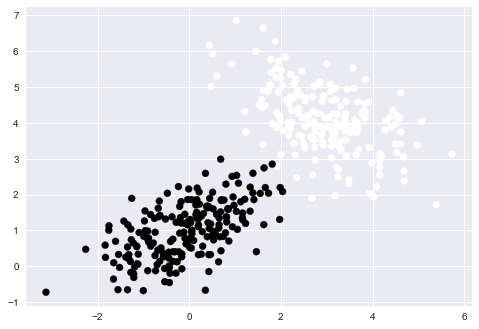

In [25]:
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c=Y)
#plt.scatter(1,0,c=knn(X,Y,[1,0]),marker="^")
plt.show()
#c=knn(X,Y,[1,0])
#print(c)

In [40]:
# Eucledian distance:-

def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))



# K Nearest Neighbours algorithm :-

def knn(X,Y,querypoint,k=5):
    vals=[]
    
    # total no. of points
    m=X.shape[0]
    
    # calculating distance from all points
    for i in range(m):
        vals.append((distance(X[i],querypoint),Y[i]))
    
    # sorting points on the basis of distance  
    
    #vals = sorted(vals)
    vals = sorted(vals,key=lambda x:x[0] )
    
    # Taking Nearest/First K points
    vals = vals[:k] 
    vals=np.array(vals)
  
    # Finding frequency of points which belong to a paticular classification
    new_vals=np.unique(vals[:,1],return_counts=True)
    
    index= new_vals[1].argmax()
    
    return new_vals[0][index]
    
    

In [41]:
pred=knn(X,Y,[0,2])
print(pred)

1.0


## Recognising Handwritten Digits on MNIST Dataset using KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/shivamg10/machine-learning-online-2018/master/Datasets/MNIST-2/mnist_train.csv")

In [3]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data=df.values
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [5]:
pixels=data[:,1:]
labels=data[:,0]

In [6]:
labels.shape

(42000,)

In [7]:
np.random.shuffle(data)

In [8]:
split=int((0.8)*pixels.shape[0])
print(split)
print(pixels.shape[0]-split)

33600
8400


In [9]:
X_train=pixels[:split , :]
Y_train=labels[:split]
X_test=pixels[split: , :]
Y_test=labels[split:]

7


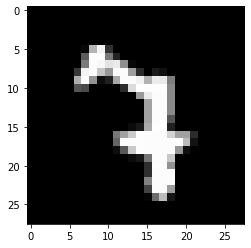

In [10]:
# Visualise some Samples

def drawimg(Sample):
    img=Sample.reshape((28,28))
    plt.imshow(img,cmap="gray")
    plt.show()
    
print(Y_test[8399])
drawimg(X_test[8399])    

2


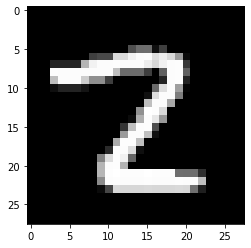

In [11]:
print(Y_test[8200])
drawimg(X_test[8200])  

9


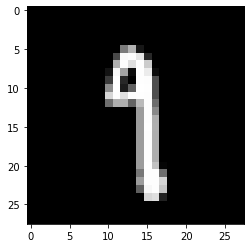

In [13]:
print(Y_test[5500])
drawimg(X_test[5500])  

In [15]:
# Eucledian distance:-

def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))



# K Nearest Neighbours algorithm :-

def knn(X,Y,querypoint,k=5):
    vals=[]
    
    # total no. of points
    m=X.shape[0]
    
    # calculating distance from all points
    for i in range(m):
        vals.append((distance(X[i],querypoint),Y[i]))
    
    # sorting points on the basis of distance  
    
    vals = sorted(vals)
    # vals = sorted(vals,key=lambda x:x[0] )
    
    # Taking Nearest/First K points
    vals = vals[:k] 
    vals=np.array(vals)
    
    # Finding frequency of points which belong to a paticular classification
    new_vals=np.unique(vals[:,1],return_counts=True)
    index= new_vals[1].argmax()
    
    return new_vals[0][index]

## Make Predictions 

In [16]:
pred=knn(X_train,Y_train,X_test[186])
print(int(pred))

6


# Above you can see my Prediction is 6 ,
# Below is the image of the figure being predicted

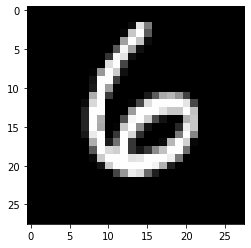

In [17]:
drawimg(X_test[186])

In [18]:
pred=knn(X_train,Y_train,X_test[296])
print(int(pred))

1


# Above you can see my Prediction is 1 ,
# Below is the image of the figure being predicted

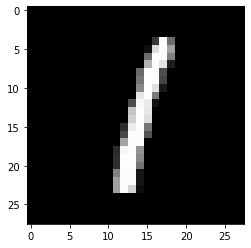

In [20]:
drawimg(X_test[296])

In [21]:
pred=knn(X_train,Y_train,X_test[1322])
print(int(pred))

3


# Above you can see my Prediction is 3 ,
# Below is the image of the figure being predicted

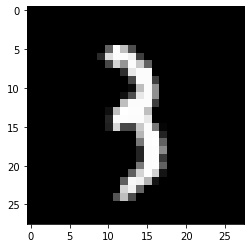

In [23]:
drawimg(X_test[1322])